<a href="https://colab.research.google.com/github/baut-jc/DDDS-My-Projects/blob/main/Project_1_Check_List.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – Transaction Success Prediction Using Naive Bayes


## Problem Definition

The goal is to predict if a customer will make a transaction based on their transaction history


This is a binary classification problem since each customer will either make a transaction or not. This project will use Naive Bayes classification.


## Data Collection

2. Load Pandas, Numpy, and Matplotlib.

1. Load data Train.csv from AWS S3.



In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import random # --> sourced from Andrew DDC-DS18

In [2]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv'
transaction_data = pd.read_csv(base_path)

In [3]:
transaction_data

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049995,1049995,train_1049995,1.0,11.3251,16.4148,20.5955,NaN,-6.3011,NaN,NaN,...,NaN,1.3921,NaN,-16.4925,NaN,NaN,NaN,NaN,NaN,14.4421
1049996,1049996,train_1049996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049997,1049997,train_1049997,0.0,8.9941,13.4127,3.9567,NaN,3.5744,NaN,NaN,...,NaN,2.0836,NaN,-18.6168,NaN,NaN,NaN,NaN,NaN,14.0689
1049998,1049998,train_1049998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

4. Examine the data using tools we have used in class.

1. If there are data cleaning issues, develop recommendations for how to deal with them.



In [4]:
transaction_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
transaction_data.shape

(1050000, 104)

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [7]:
transaction_data.describe(include = 'all')

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
count,1.050000e+06,1050000,180000.000000,180000.000000,180000.000000,180000.000000,0.0,180000.000000,0.0,0.0,...,0.0,180000.000000,0.0,180000.000000,0.0,0.0,0.0,0.0,0.0,180000.000000
unique,NaN,1050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,train_1049983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.249995e+05,NaN,0.100222,7.440715,15.870166,12.735619,NaN,-0.668334,NaN,NaN,...,NaN,-3.294620,NaN,-6.727860,NaN,NaN,NaN,NaN,NaN,14.224538
std,3.031090e+05,NaN,0.300297,3.021636,3.010492,4.185923,NaN,5.968300,NaN,NaN,...,NaN,7.418545,NaN,8.278554,NaN,NaN,NaN,NaN,NaN,0.171058
min,0.000000e+00,NaN,0.000000,-2.691700,6.299300,-1.018500,NaN,-22.748700,NaN,NaN,...,NaN,-29.984000,NaN,-35.211700,NaN,NaN,NaN,NaN,NaN,13.729000
25%,2.624998e+05,NaN,0.000000,5.160325,13.830400,9.664675,NaN,-4.997500,NaN,NaN,...,NaN,-8.757925,NaN,-12.835875,NaN,NaN,NaN,NaN,NaN,14.098900
50%,5.249995e+05,NaN,0.000000,7.350950,15.934600,12.670700,NaN,-0.560300,NaN,NaN,...,NaN,-3.170950,NaN,-6.615100,NaN,NaN,NaN,NaN,NaN,14.226800
75%,7.874992e+05,NaN,0.000000,9.511125,18.061425,15.837300,NaN,3.632525,NaN,NaN,...,NaN,2.043350,NaN,-0.885250,NaN,NaN,NaN,NaN,NaN,14.361800


In [8]:
transaction_data.isna().sum()

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


In [9]:
transactions = transaction_data.copy()
transactions.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
0,0,train_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,train_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,train_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,train_3,0.0,4.6739,22.3915,15.6015,NaN,0.0464,NaN,NaN,...,NaN,11.1077,NaN,-12.6465,NaN,NaN,NaN,NaN,NaN,14.0618
4,4,train_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# remove unnecessary columns 'Unnamed:0' and 'ID-code'
transactions.drop('Unnamed: 0', axis=1, inplace=True)
transactions.drop('ID_code', axis=1, inplace=True)

In [11]:
transactions.dropna(thresh = 1, axis = 1, inplace = True) # <--- why use thresh instead of subset

print(transactions)

         target    var_0    var_1    var_2   var_4   var_7   var_8   var_14  \
0           NaN      NaN      NaN      NaN     NaN     NaN     NaN      NaN   
1           NaN      NaN      NaN      NaN     NaN     NaN     NaN      NaN   
2           NaN      NaN      NaN      NaN     NaN     NaN     NaN      NaN   
3           0.0   4.6739  22.3915  15.6015  0.0464 -1.9254  6.4760  21.6435   
4           NaN      NaN      NaN      NaN     NaN     NaN     NaN      NaN   
...         ...      ...      ...      ...     ...     ...     ...      ...   
1049995     1.0  11.3251  16.4148  20.5955 -6.3011 -6.8112  7.3226  14.9182   
1049996     NaN      NaN      NaN      NaN     NaN     NaN     NaN      NaN   
1049997     0.0   8.9941  13.4127   3.9567  3.5744  1.6614  6.1486  12.0996   
1049998     NaN      NaN      NaN      NaN     NaN     NaN     NaN      NaN   
1049999     0.0   2.1828  12.3805  17.5654  8.1795 -5.5755  6.3705   5.1813   

         var_15   var_17  ...   var_83  var_84  var

In [12]:
#Count the # of NaN and  values for collum target
transactions['target'].value_counts(dropna = False)

,count
target,
NaN,870000
0.0,161960
1.0,18040


In [13]:
transactions.shape

(1050000, 51)

In [14]:
transactions.dropna(subset= 'target', how='any', axis = 0, inplace=True) # filter
transactions

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [15]:
transactions.isna()

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049993,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis

6. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

1. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.
- binary values of 0/1 ---> with consideration of the 'target' column'. Analogous with the *titanic project*.
1. Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

1. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.





In [16]:
transactions_cleaned = transactions.copy()
transactions_cleaned

,target,var_0,var_1,var_2,var_4,var_7,var_8,var_14,var_15,var_17,...,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_92,var_94,var_100
3,0.0,4.6739,22.3915,15.6015,0.0464,-1.9254,6.4760,21.6435,2.8817,11.6975,...,11.8011,3.9677,9.5382,-8.4394,5.5043,2.2732,1.6362,11.1077,-12.6465,14.0618
5,0.0,14.6962,18.3383,17.4788,-9.1355,-6.4882,6.0821,11.7476,2.2225,7.2218,...,11.8294,3.8887,8.8591,6.1482,8.5833,2.8432,1.8434,-2.0111,-3.6166,14.4520
11,0.0,4.4949,14.4142,13.2219,4.9140,4.0501,5.8144,18.7136,3.4990,4.2892,...,11.7464,4.0017,5.8179,10.4951,12.4494,2.8009,0.3394,13.9424,-15.5776,14.1222
15,0.0,4.9657,16.2867,17.9579,0.6017,-5.4904,6.6670,8.1019,2.8910,8.2374,...,11.5481,3.9809,8.2247,21.2257,6.9931,3.3939,-2.3905,3.7943,5.6184,14.0619
19,0.0,9.4287,18.7822,10.7630,-0.7532,8.8477,6.8045,19.0069,3.2771,12.6446,...,10.8981,4.1808,9.4220,1.8563,10.5738,1.2409,-1.3888,-5.6677,-1.8961,14.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049990,0.0,7.9632,20.4650,10.7295,2.9322,5.0267,7.1953,10.0695,3.0732,11.0135,...,12.1000,4.2019,7.1249,14.6591,10.2705,3.5833,2.5588,10.4219,-19.7158,14.0582
1049993,0.0,5.0862,14.4785,17.3709,-2.4732,-2.5987,6.6798,3.0420,2.4057,18.2729,...,10.9960,3.9637,8.0217,11.0449,9.3100,1.0545,-2.8770,-2.8052,-13.7290,14.3794
1049995,1.0,11.3251,16.4148,20.5955,-6.3011,-6.8112,7.3226,14.9182,2.4579,14.7175,...,11.2265,3.8431,8.2748,-7.8464,9.9774,1.7377,-1.7942,1.3921,-16.4925,14.4421
1049997,0.0,8.9941,13.4127,3.9567,3.5744,1.6614,6.1486,12.0996,2.5439,10.2936,...,10.5067,4.0642,8.3381,17.9081,12.3357,2.6530,-1.2359,2.0836,-18.6168,14.0689


In [17]:
# transactions_cleaned.hist('var_7', alpha=0.6, bins=50, color='blue')
# transactions_cleaned.hist('var_8', alpha=1.0, bins=50, color='green')
# transactions_cleaned.hist('var_14', alpha=0.8, bins=50, color='brown'); #defaults to 10 bins

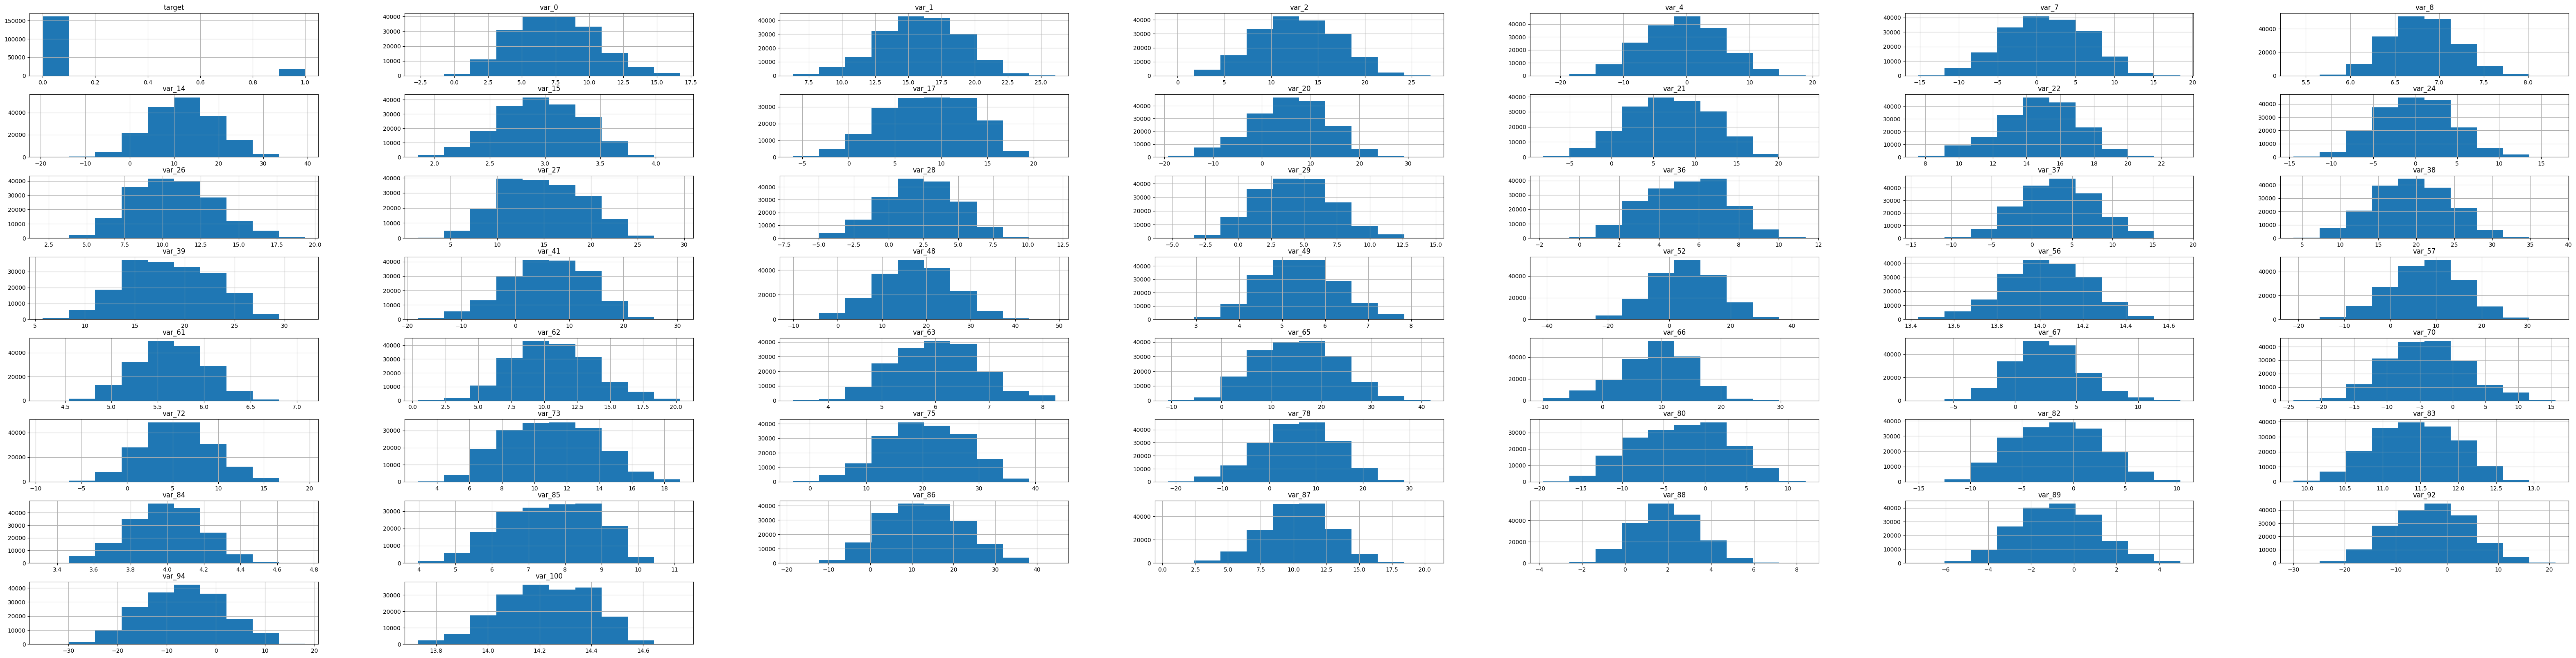

In [18]:
transactions_cleaned.hist(figsize=(80,20));

# Histograms describes the frequency in which data appears in the data set. In the graph above, it shows that most of our features (var_nn) displays normally distributed.

# Assumption2: none of the features are highly correlated to each other.

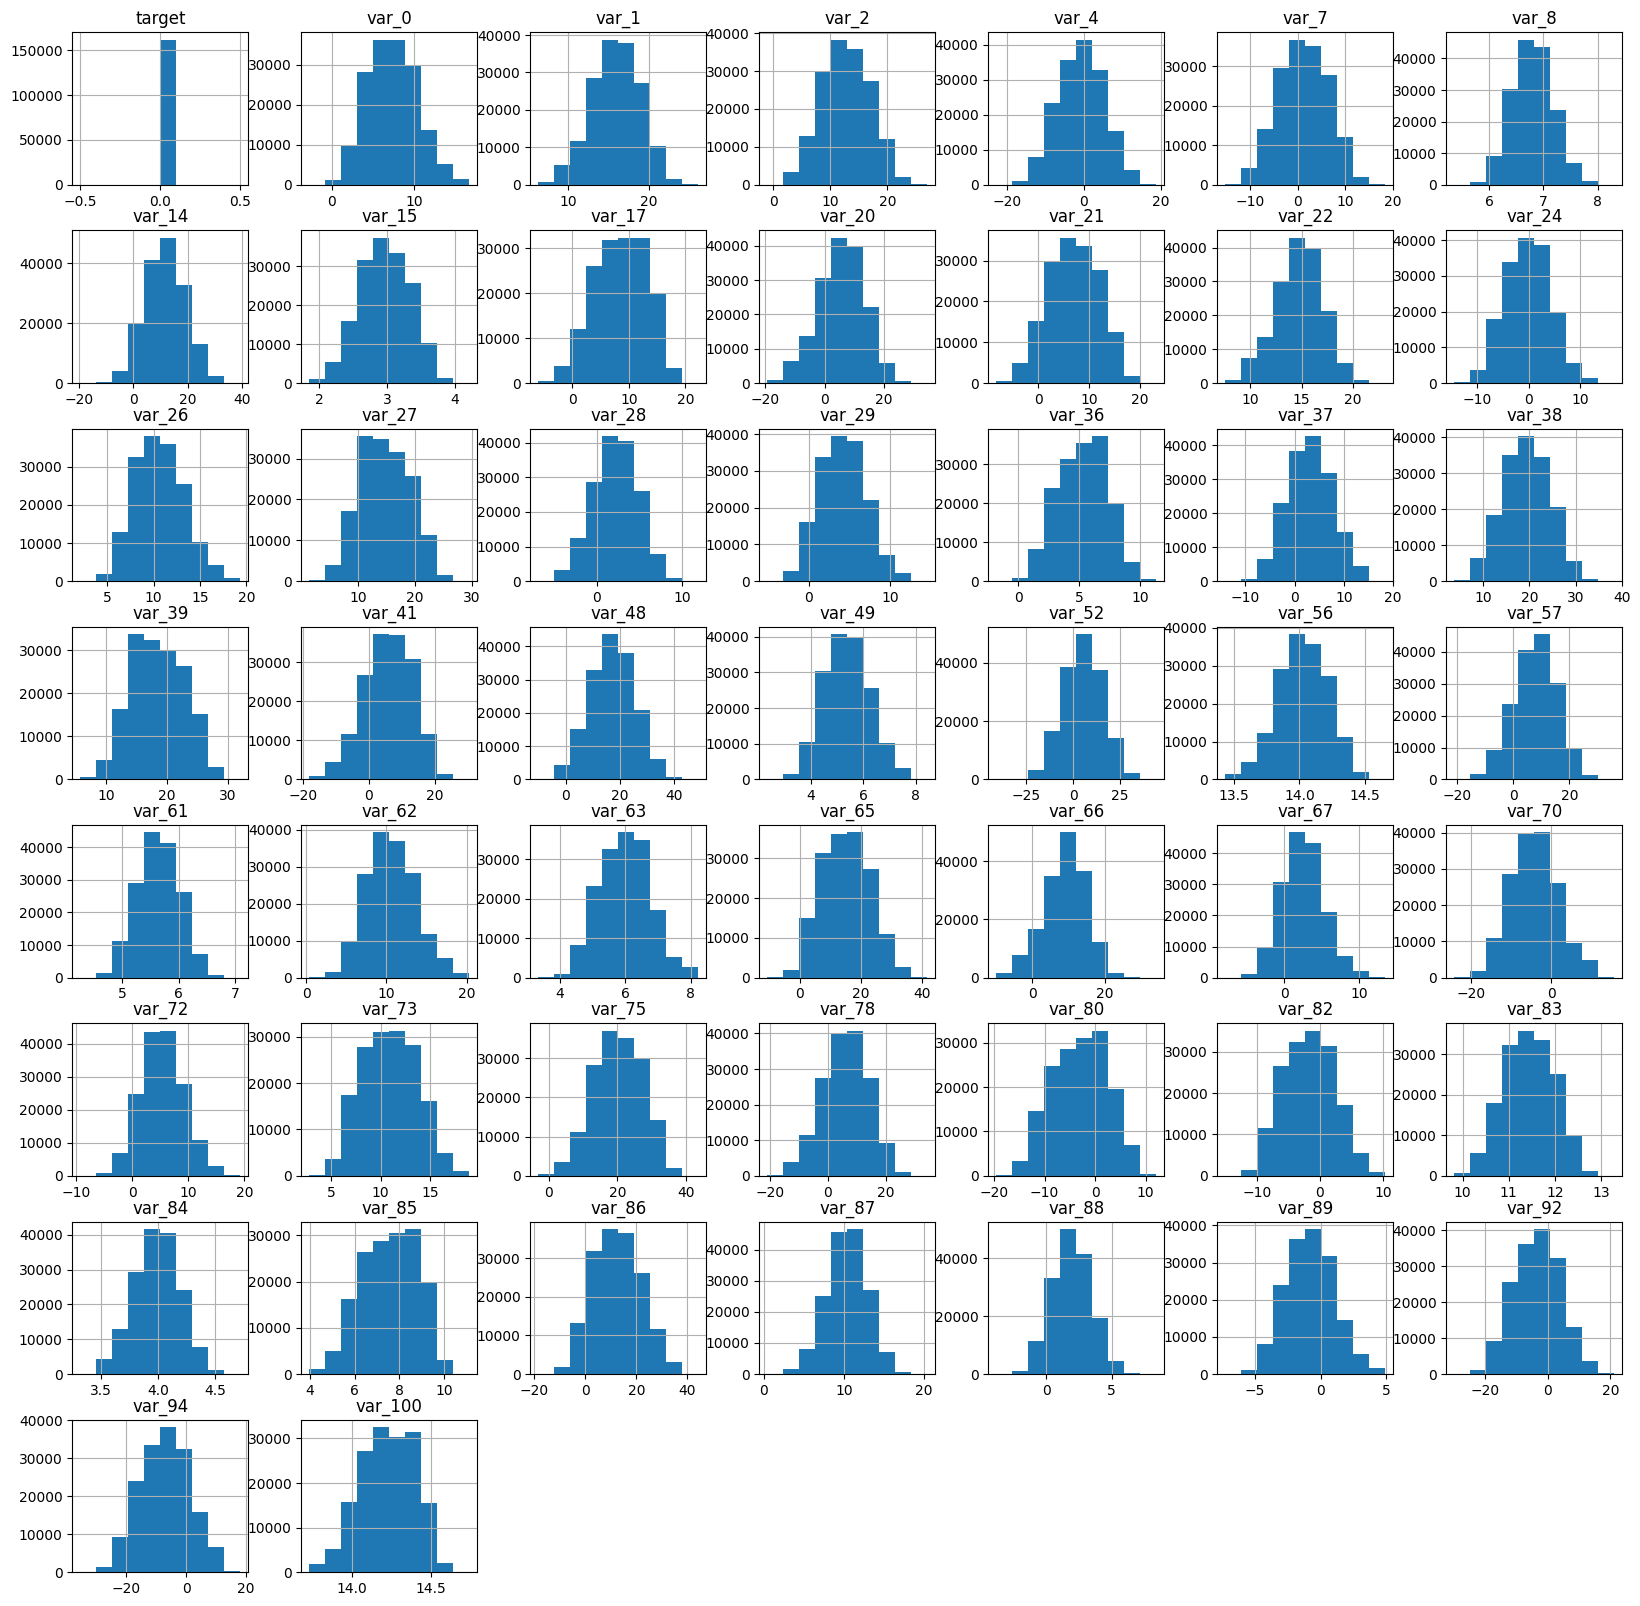

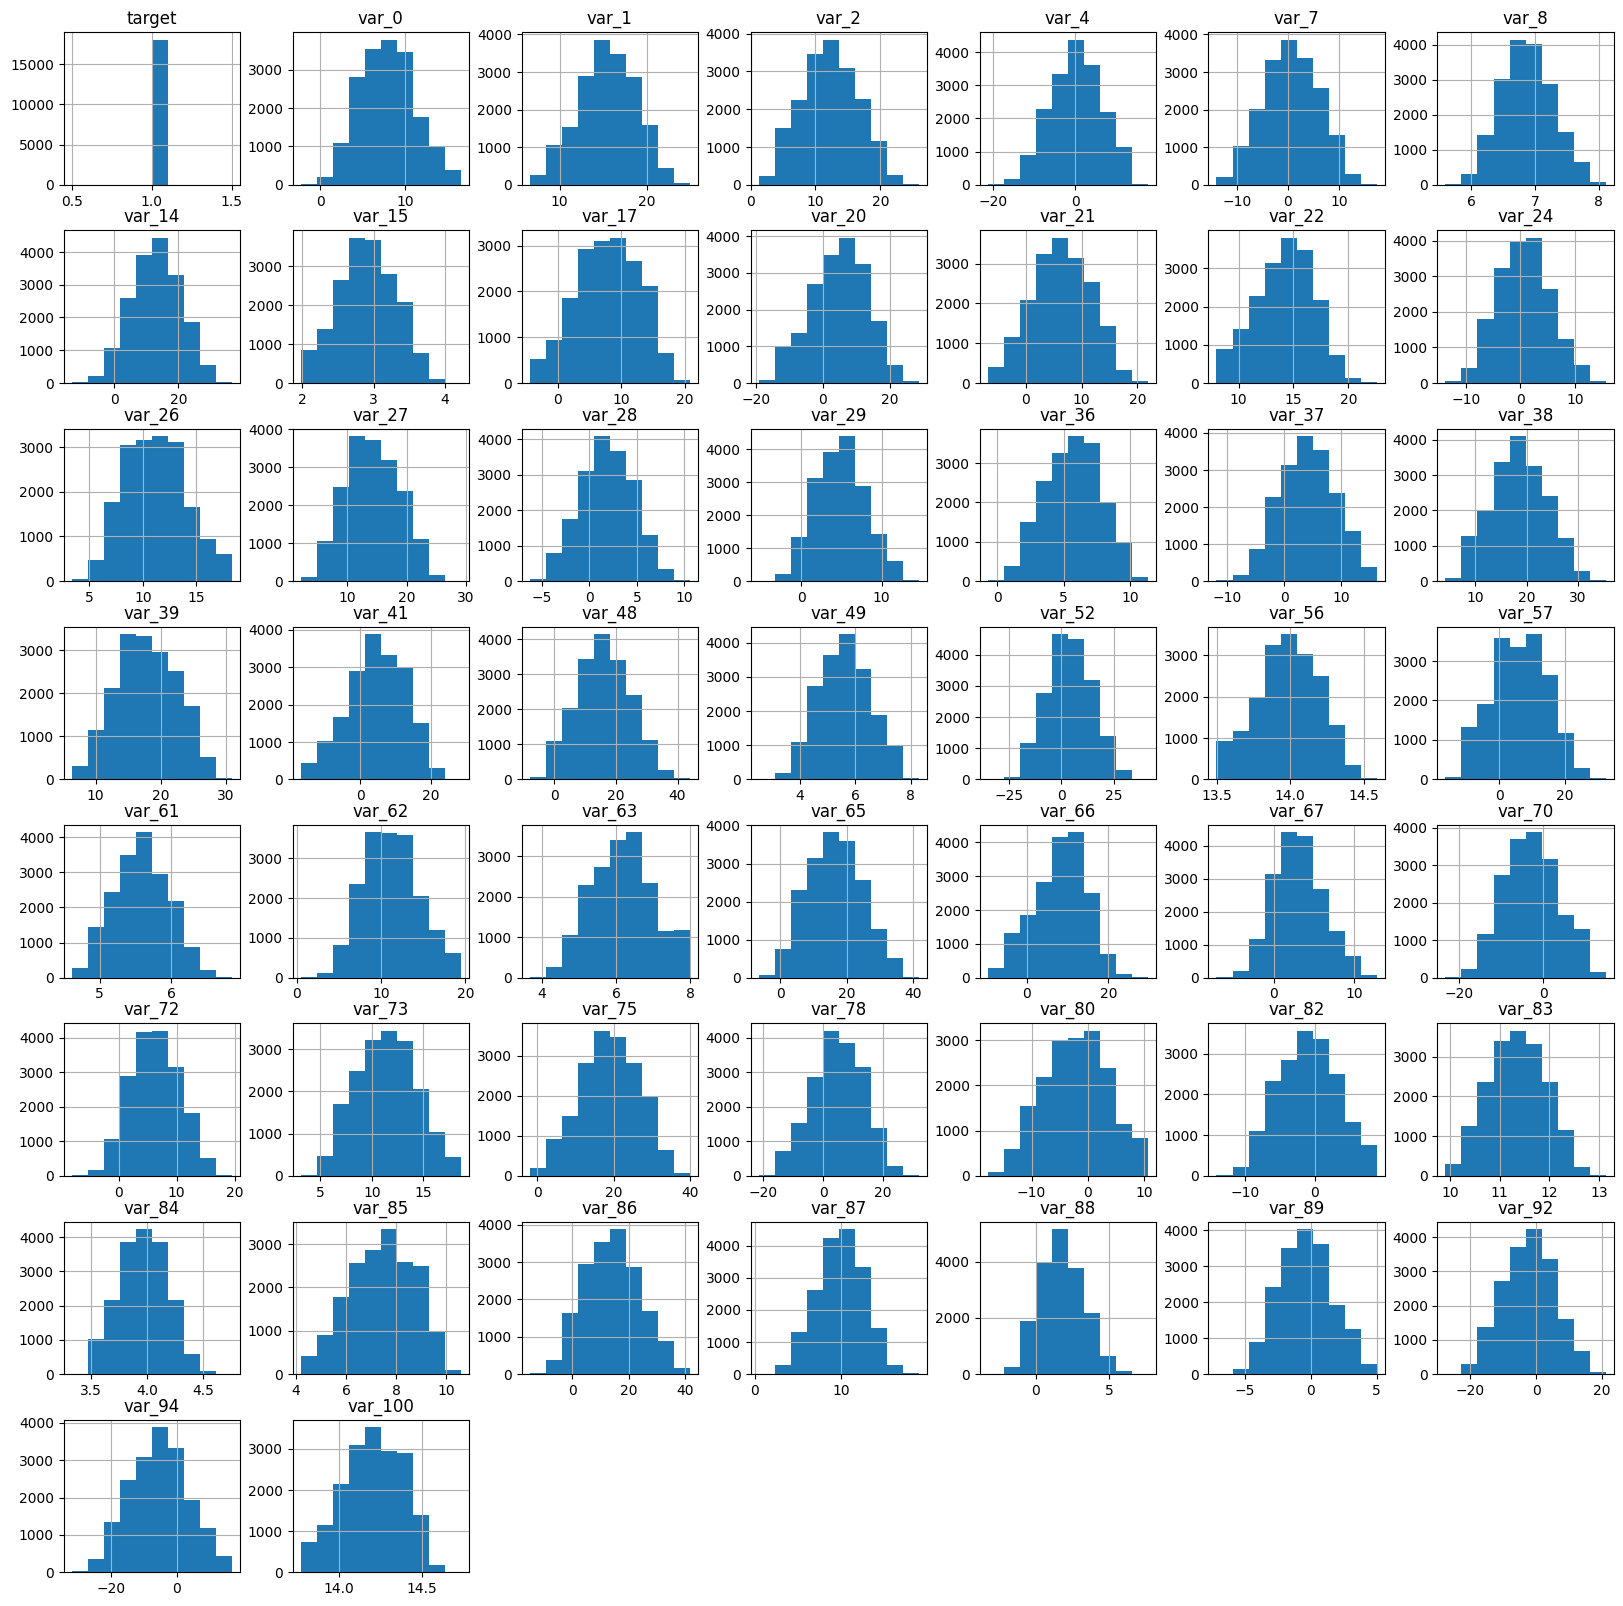

In [19]:
transactions_cleaned.groupby(['target']).hist(figsize=(20,20));

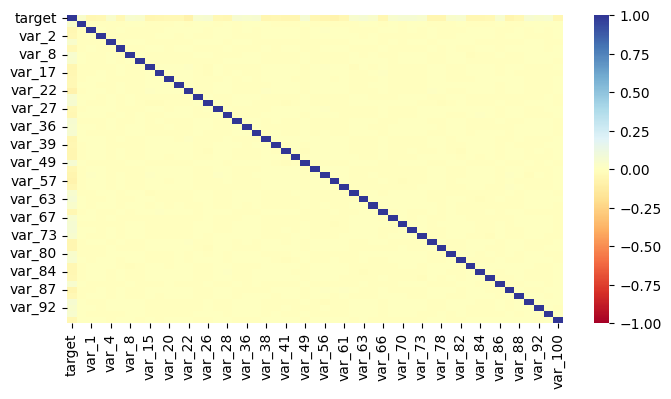

In [20]:
corr = transactions_cleaned.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin=-1, vmax=1);

## Data Processing

10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.

1. Define a Gaussian Naïve Bayes model using Sklearn.

1. Divide the two data frames you created in step #10 into training and testing subsets.

1. Train the model using the training subset of the dataset.

1. Test the model using the testing subset of the dataset. Calculate and report the accuracy.

1. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?

1. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?

1.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?

1. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.

1. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.



In [21]:
y = transactions_cleaned['target'].copy()
X = transactions_cleaned.drop('target', axis=1, inplace=False)

In [22]:
gnb = GaussianNB() #Step 0(11) creating an empty model for testing and prediction.

In [23]:
#Step1(12) train, test, split 20% of data that model is not using for learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Step2(13) fit the model 80% of data into model for it to learn what the patterns are
gnb.fit(X_train, y_train)

#Step3(14) prediction input features from test set and outputs presdictions for target in my test set.
y_pred = gnb.predict(X_test) # --> predicts based on (X_test = 20%)

#Step4(14) communicate by Compare y-prediction to y-test(20%; transaction outcomes that is true)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"

Number of mislabeled points out of a total 36000 points : 3211


In [24]:
36000 - 3211 # =32789 correct points
(32789 / 36000) * 100  # 91.08055555555555

91.08055555555555

In [25]:
# Cross Validation (15)
def cross_validate(X, y, num_loops): #(feature, target, #times to run model)
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

# will run based on the number of 'num_loops'
  for i in range(num_loops):
    model_split_cv = GaussianNB() #step0 empty model
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #step1 test>train>split
    model_split_cv.fit(X_train, y_train) #step2 fitting/train model
    y_split_pred = model_split_cv.predict(X_test) #step3 make prediction
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred) #step4 test for accuracy

  return accuracy_scores

In [26]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91126


In [32]:
acc_score = round(accuracy_scores.mean(), 4)*100
print(f'the prediction score {acc_score}%')

the prediction score 91.13%


## Data Visualization


20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data

1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)




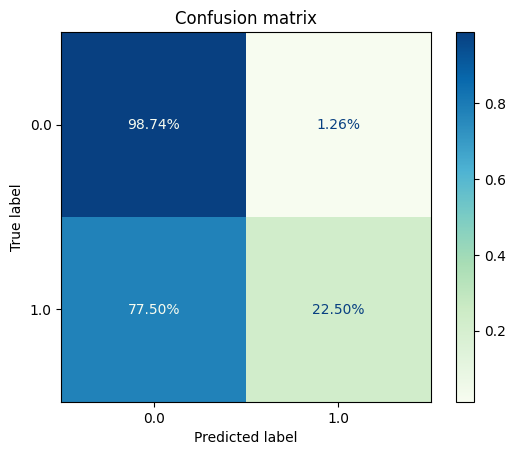

In [28]:
#Confusion Matrix (20)
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true', #formatting
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png') #False-negative accuracy

# predicted accurately with 98.74% unsuccessful transactions
# referring to the histograms, there are more (0 - unsuccessful transactions) based on the 'target'
# histogram datasset shows an unbalanced data set.

## Communicate the Results

22. Communicate the results of your analysis.



[Project 1 Analysis Slides](https://docs.google.com/presentation/d/e/2PACX-1vQk2nfCxXOBXmsKF9rtdPDHA6vJfC67MLL2Yq2jsTEDZA4lwwk4uPmHvQuPGeozIjOzQT6e5Mhgevc9/pub?start=false&loop=false&delayms=3000
) by Jocelle Bautista



## Submit Final Project

23. Upload your finished Jupyter notebook to your Project 1 student folder.
